<a href="https://colab.research.google.com/github/anubhavshrestha/sift_feature_extraction/blob/main/SIFT_TRAINED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim

transforms_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    # transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

transforms_test = transforms.Compose([
     transforms.ToTensor(),
    # transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform = transforms_train)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers = 0)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform = transforms_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers = 0)

100%|██████████| 170498071/170498071 [00:01<00:00, 100264575.44it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
def show_image(image, label):
    plt.imshow(transforms.ToPILImage()(image))
    plt.title(f"Label: {label}")
    plt.axis('off')
    plt.show()

def show_sift_image(image):
    image_np = np.array(transforms.ToPILImage()(image))  # Convert to NumPy array
    gray = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)
    sift = cv2.SIFT_create()
    kp = sift.detect(gray, None)

    # Create a black image to draw SIFT keypoints on
    sift_image = np.zeros_like(image_np)

    # Draw SIFT keypoints on the black image
    sift_image = cv2.drawKeypoints(image_np, kp, sift_image, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    # print(sift_image)

    # plt.imshow(sift_image.shape)
    # print("HELLO!!!!")
    plt.title("SIFT Keypoints")
    plt.axis('off')
    plt.show()

def extract_sift_features_and_visualize(image_tensor):
    # Convert PyTorch tensor to NumPy array
    image_tensor = image_tensor.permute(1,2,0)
    image_np = image_tensor.numpy().astype(np.uint8)

    # Convert NumPy array to BGR format (OpenCV image)
    # img = cv2.cvtColor(np.transpose(image_np.astype(np.uint8), (1, 2, 0)), cv2.COLOR_RGB2BGR)
    img = image_np

    # Converting the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Initialize the SIFT detector
    sift = cv2.SIFT_create()

    # Detect keypoints in the image
    kp = sift.detect(gray, None)

    # Draw the keypoints on the image
    # img_with_keypoints = cv2.drawKeypoints(img, kp, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    img_with_keypoints=cv2.drawKeypoints(gray ,
                      kp ,
                      img ,
                      flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    # Visualize the original image and the image with SIFT keypoints side by side
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
    plt.title('Image with SIFT Keypoints')
    plt.axis('off')

    plt.show()

    # Save the image with keypoints
    # cv2.imwrite('image-with-keypoints.jpg', img_with_keypoints)
def convert_tensor_to_sift(image_tensor):
# Convert the PyTorch tensor to a NumPy array and permute the dimensions
  image_np = np.transpose(image_tensor.numpy(), (1, 2, 0))

  # Convert to uint8 data type
  image_np = (image_np * 255).astype(np.uint8)

  # Convert to grayscale if the image has multiple channels
  if image_np.shape[-1] == 3:
      image_np = cv2.cvtColor(image_np, cv2.COLOR_RGB2GRAY)

  # Initialize the SIFT detector
  sift = cv2.SIFT_create()

  # Detect keypoints and compute descriptors
  kp, des = sift.detectAndCompute(image_np, None)

  keypoints_with_descriptors = np.hstack((np.array([kp[idx].pt for idx in range(len(kp))]), des))


  # Draw the keypoints on the image
  img_with_keypoints = cv2.drawKeypoints(image_np, kp, None)
  # print("IMG WITH KEYPOINTS: ", img_with_keypoints)
  shape = img_with_keypoints.shape
  # print("THE SHAPE IS: ", shape)

  # Visualize the image with keypoints
  # plt.imshow(img_with_keypoints)
  # plt.title('Image with SIFT Keypoints')
  # plt.axis('off')
  # plt.show()
  # print("KP: ",len(kp))
  # print("DESCRIPTOR: ",des.shape)
  # print(des)
  return torch.tensor(np.transpose(img_with_keypoints,(2,0,1)))

def convert_images_to_sift(image_tensors):
  sift_tensors = []
  for image_tensor in image_tensors:
    sift_tensor = convert_tensor_to_sift(image_tensor)
    sift_tensors.append(sift_tensor)

  stacked_sift_tensors = torch.stack(sift_tensors)
  return stacked_sift_tensors


IMAGeS SHAPE:  torch.Size([128, 3, 32, 32])
<class 'torch.Tensor'>


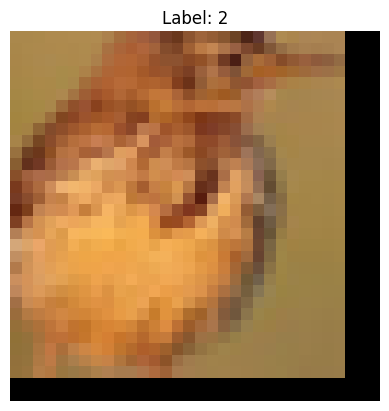

torch.Size([3, 32, 32])
CONVERTED SHAPE =  torch.Size([128, 3, 32, 32])


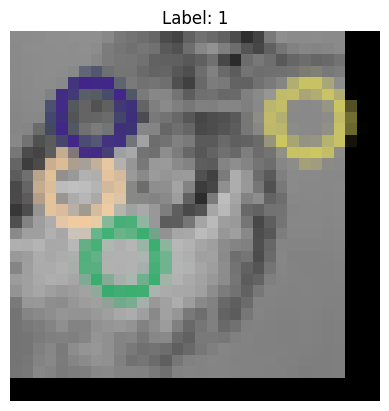

<class 'torch.Tensor'>


In [ ]:
for data in trainloader:
  images, labels = data
  print("IMAGeS SHAPE: ", images.shape)
  for image, label in zip(images,labels):
    print(type(image))
    show_image(image, label)
    print(convert_tensor_to_sift(image).shape)
    break
  x = convert_images_to_sift(images)
  print("CONVERTED SHAPE = ", x.shape)
  show_image(x[0], 1)
  print(type(x))
  break

In [ ]:
class Net(nn.Module):
    def __init__ (self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3,64,4, stride=1, padding=2)
        self.batch_normalize = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64,64,4, stride=1, padding=2)
        self.pool = nn.MaxPool2d(2, 2)
        self.drop = nn.Dropout(p=0.5)
        self.conv3 = nn.Conv2d(64,64,4, stride=1, padding=2)
        self.conv4 = nn.Conv2d(64,64,4, stride=1, padding=2)
        self.conv5 = nn.Conv2d(64,64,4, stride=1, padding=2)
        self.conv6 = nn.Conv2d(64,64,3, stride=1, padding=0)
        self.conv7 = nn.Conv2d(64,64,3, stride=1, padding=0)
        self.conv8 = nn.Conv2d(64,64,3, stride=1, padding=0)
        self.full_conn_1 = nn.Linear(64*4*4, 500)
        self.full_conn_2 = nn.Linear(500, 500)
        self.full_conn_3 = nn.Linear(500, 10)

    def forward(self, x):
        x = self.batch_normalize(F.relu(self.conv1(x)))
        x = self.drop(self.pool(F.relu(self.conv2(x))))
        x = self.batch_normalize(F.relu(self.conv3(x)))
        x = self.drop(self.pool(F.relu(self.conv4(x))))
        x = self.batch_normalize(F.relu(self.conv5(x)))
        x = self.drop(F.relu(self.conv6(x)))
        x = self.batch_normalize(F.relu(self.conv7(x)))
        x = self.drop(self.batch_normalize(F.relu(self.conv8(x))))
        x = x.view(-1, 64*4*4)
        x = F.relu(self.full_conn_1(x))
        x = F.relu(self.full_conn_2(x))
        x = self.full_conn_3(x)
        return x

net = Net()
net.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# training the model

for epoch in range(10):  # loop over the dataset multiple times

    total_right = 0
    total = 0

    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs = convert_images_to_sift(inputs)
        inputs = inputs.to(torch.float32)
        inputs, labels = Variable(inputs).cuda(), Variable(labels).cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        #accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        total_right += (predicted == labels.data).float().sum()

    print("Training Accuracy for epoch {} : {}".format(epoch+1,total_right/total))

    if (epoch+1) % 5 == 0:
        torch.save(net, 'save_params.ckpt')

# test the model

my_model = torch.load('save_params.ckpt')

total_right = 0
total = 0


with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = convert_images_to_sift(images)
        images = images.to(torch.float32)
        images, labels = Variable(images).cuda(), Variable(labels).cuda()
        outputs = my_model(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        total_right += (predicted == labels.data).float().sum()

print('Test accuracy: %d %%' % (
    100 * total_right / total))

In [ ]:
for epoch in range(10):  # loop over the dataset multiple times

    total_right = 0
    total = 0

    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data
        inputs = convert_images_to_sift(inputs)
        inputs = inputs.to(torch.float32)
        inputs, labels = Variable(inputs).cuda(), Variable(labels).cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        #accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        total_right += (predicted == labels.data).float().sum()

    print("Training Accuracy for epoch {} : {}".format(epoch+1,total_right/total))

    if (epoch+1) % 5 == 0:
        torch.save(net, 'save_params.ckpt')

# test the model

my_model = torch.load('save_params.ckpt')

total_right = 0
total = 0


with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = convert_images_to_sift(images)
        images = images.to(torch.float32)
        images, labels = Variable(images).cuda(), Variable(labels).cuda()
        outputs = my_model(images)

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        total_right += (predicted == labels.data).float().sum()

print('Test accuracy: %d %%' % (
    100 * total_right / total))

Training Accuracy for epoch 1 : 0.5791599750518799
Training Accuracy for epoch 2 : 0.585379958152771
Training Accuracy for epoch 3 : 0.5965399742126465
Training Accuracy for epoch 4 : 0.5969399809837341
Training Accuracy for epoch 5 : 0.6065999865531921
Training Accuracy for epoch 6 : 0.6099199652671814
Training Accuracy for epoch 7 : 0.615619957447052
Training Accuracy for epoch 8 : 0.6229400038719177
Training Accuracy for epoch 9 : 0.6263200044631958
Training Accuracy for epoch 10 : 0.6256399750709534
Test accuracy: 62 %
